<a href="https://colab.research.google.com/github/AyushMaria/Vortex-Detection/blob/main/Core_detection_(Voting_Classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing linear algebra
import numpy as np 

# Importing tools for data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

#Importing the tools to call google drive
from google.colab import drive

In [ ]:
# Mount the Google Drive at mount
mount='/content/gdrive'
drive.mount(mount, force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Switch to the directory on the Google Drive that we want to use
drive_root=mount + '/My Drive/Colab Notebooks/Object Detection'
%cd $drive_root
%pwd

/content/gdrive/My Drive/Colab Notebooks/Object Detection


'/content/gdrive/My Drive/Colab Notebooks/Object Detection'

In [ ]:
# Importing the image feature dataset for the classifier
data = pd.read_csv('adaboost.csv')

# Obtaining a visual of the dataset
data.head()

,ID,contourArea,areaPercDiff,aspectRatio,momentLocDiff,label
0,1,283.5,67.500000,0.952381,28.491470,vortex
1,2,2281.5,52.388060,1.030769,24.713409,vortex
2,3,1177.0,53.891941,1.238095,24.540352,vortex
3,4,2285.0,32.503556,0.778947,51.181107,no_vortex
4,5,3155.5,63.490946,1.014286,51.263397,vortex


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             36 non-null     int64  
 1   contourArea    36 non-null     float64
 2   areaPercDiff   36 non-null     float64
 3   aspectRatio    36 non-null     float64
 4   momentLocDiff  36 non-null     float64
 5   label          36 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.8+ KB


In [ ]:
# Assigning the important features to X 
X = data[['contourArea','areaPercDiff','aspectRatio','momentLocDiff']]

# Confirming the values within X
X.head()

,contourArea,areaPercDiff,aspectRatio,momentLocDiff
0,283.5,67.500000,0.952381,28.491470
1,2281.5,52.388060,1.030769,24.713409
2,1177.0,53.891941,1.238095,24.540352
3,2285.0,32.503556,0.778947,51.181107
4,3155.5,63.490946,1.014286,51.263397


In [ ]:
# Assigning the label values to y
y = data['label']

# Confirming if the right value have been assigned to y
y.head()

0       vortex
1       vortex
2       vortex
3    no_vortex
4       vortex
Name: label, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

# Import the XGBoost Classifier 
from xgboost import XGBClassifier

#Import the Light Gradient Boost Classifier
import lightgbm as lgb

# Import the Voting CLassifier
from sklearn.ensemble import VotingClassifier

# Importing the necessary tools to check how the clasifiers performed
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# Creating classifer objects and assigning them with the appropriate parameters
clf1 = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0)
clf2 = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=0)
clf3 = XGBClassifier(n_estimators=100, learning_rate=1, random_state=0)
clf4 = lgb.LGBMClassifier(max_depth=1, learning_rate=1)

# Training the Classifers using the fit method
model1 = clf1.fit(X_train, y_train)
model2 = clf2.fit(X_train, y_train)
model3 = clf3.fit(X_train, y_train)
model4 = clf4.fit(X_train, y_train)

# Assigning the fitted models to the voting classifier and then fitting the voting classifier
eclf = VotingClassifier( estimators=[('abc', model1), ('rf', model2), ('xgb', model3)],voting='hard')
model5 = eclf.fit(X_train, y_train)


# Determining the accuracy of each model 
for clf, label in zip([model1, model2, model3, model4, model5], ['AdaBoost Classifier', 'Random Forest', 'XGBoost Classifier','LightGBM Classifier', 'Ensemble']):
  y_pred = clf.predict(X_test)
  print(clf, accuracy_score(y_test, y_pred))

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=0) 0.7272727272727273
RandomForestClassifier(max_depth=1, random_state=0) 0.6363636363636364
XGBClassifier(learning_rate=1) 0.9090909090909091
LGBMClassifier(learning_rate=1, max_depth=1) 0.6363636363636364
VotingClassifier(estimators=[('abc',
                              AdaBoostClassifier(learning_rate=1,
                                                 n_estimators=100,
                                                 random_state=0)),
                             ('rf',
                              RandomForestClassifier(max_depth=1,
                                                     random_state=0)),
                             ('xgb', XGBClassifier(learning_rate=1))]) 0.7272727272727273


In [ ]:
#Predict the response for test dataset
y_pred = model5.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.70      1.00      0.82         7

    accuracy                           0.73        11
   macro avg       0.85      0.62      0.61        11
weighted avg       0.81      0.73      0.67        11



In [ ]:
for i in y_test:
  print(i)

0
1
1
0
1
1
0
1
0
1
1


In [ ]:
n=[]
for row in X_test.itertuples():
  n.append(row[0]+1)
  
for a in range(len(n)):
  print('Number', n[a],'is a', y_pred[a])

Number 4 is a 1
Number 1 is a 1
Number 21 is a 1
Number 23 is a 1
Number 13 is a 1
Number 11 is a 1
Number 29 is a 0
Number 7 is a 1
Number 8 is a 1
Number 12 is a 1
Number 36 is a 1


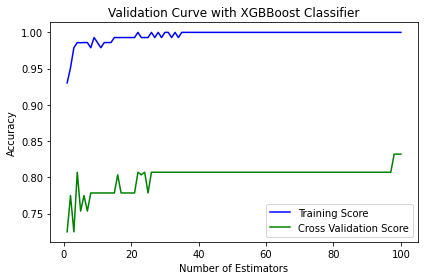

In [ ]:
# import the required metrics to plot validation curve
from sklearn.model_selection import validation_curve

# import the plotting library to visualize our learning curve
import matplotlib.pyplot as plt
 
# arranging the parameters that have to be tested
param_range = np.arange(1, 101)

# obtaining training and testing scores to plot on the graph
train_score, test_score = validation_curve(model3, X, y, param_name = "n_estimators", param_range=param_range, cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(param_range, mean_train_score, label = "Training Score", color = 'b')
plt.plot(param_range, mean_test_score, label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with XGBBoost Classifier")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix 

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)


[[3 0]
 [0 8]]


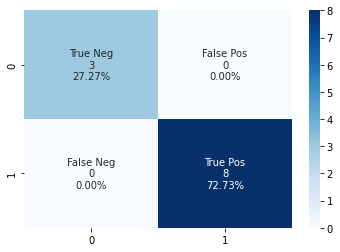

In [ ]:
import seaborn as sns
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:",(Accuracy))

Accuracy {:0.2f}%: 100.0
